In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

# 寫入檔案

In [2]:
RD_Kill = pd.read_csv('RoadKill.csv')

In [4]:
RD_Kill.head()

,Unnamed: 0,cause_of_death,collected_date,collected_place_admin,collected_place_coord,count,identifier,image,species,lon,lat,County
0,0,路殺,2013/10/28,台中市霧峰區,"24.06078, 120.741756, 143",1,259,https://roadkill.tw/sites/roadkill/files/style...,Lycodon ruhstrati ruhstrati (白梅花蛇),120.741756,24.060780,台中市
1,1,路殺,2013/11/12,台南市六甲區,"23.244977, 120.337301, 22",1,260,https://roadkill.tw/sites/roadkill/files/style...,Mesophoyx intermedia intermedia (中白鷺),120.337301,23.244977,台南市
2,2,路殺,2013/11/13,台南市六甲區,"23.247067, 120.338328, 28",1,261,https://roadkill.tw/sites/roadkill/files/style...,Eutropis longicaudata (長尾真稜蜥),120.338328,23.247067,台南市
3,3,路殺,2011/08/23,高雄市橋頭區,"22.749034, 120.296924, 6",1,262,https://roadkill.tw/sites/roadkill/files/style...,Hemidactylus bowringii (無疣蝎虎),120.296924,22.749034,高雄市
4,4,路殺,2013/07/02,雲林縣古坑鄉,"23.636502, 120.531874, 64",1,263,http://loc.roadkill.tw/sites/roadkill/files/st...,Pipistrellus abramus (東亞家蝠),120.531874,23.636502,雲林縣


In [5]:
from shapely.geometry import Point
from geopandas import GeoDataFrame
import shapely.geometry

In [59]:
RD_Kill = RD_Kill.rename(columns={'coord': 'geometry'})

In [60]:
RD_Kill

,Unnamed: 0,cause_of_death,collected_date,collected_place_admin,collected_place_coord,count,identifier,image,species,lon,lat,County
0,0,路殺,2013/10/28,台中市霧峰區,"24.06078, 120.741756, 143",1,259,https://roadkill.tw/sites/roadkill/files/style...,Lycodon ruhstrati ruhstrati (白梅花蛇),120.741756,24.060780,台中市
1,1,路殺,2013/11/12,台南市六甲區,"23.244977, 120.337301, 22",1,260,https://roadkill.tw/sites/roadkill/files/style...,Mesophoyx intermedia intermedia (中白鷺),120.337301,23.244977,台南市
2,2,路殺,2013/11/13,台南市六甲區,"23.247067, 120.338328, 28",1,261,https://roadkill.tw/sites/roadkill/files/style...,Eutropis longicaudata (長尾真稜蜥),120.338328,23.247067,台南市
3,3,路殺,2011/08/23,高雄市橋頭區,"22.749034, 120.296924, 6",1,262,https://roadkill.tw/sites/roadkill/files/style...,Hemidactylus bowringii (無疣蝎虎),120.296924,22.749034,高雄市
4,4,路殺,2013/07/02,雲林縣古坑鄉,"23.636502, 120.531874, 64",1,263,http://loc.roadkill.tw/sites/roadkill/files/st...,Pipistrellus abramus (東亞家蝠),120.531874,23.636502,雲林縣
5,5,路殺,2013/04/09,南投縣名間鄉,"23.887035, 120.709364, 91",1,264,http://loc.roadkill.tw/sites/roadkill/files/st...,Streptopelia tranquebarica huminis (紅鳩),120.709364,23.887035,南投縣
6,6,路殺,2013/03/31,台南市官田區,"23.171739, 120.353728, 22",1,265,https://roadkill.tw/sites/roadkill/files/style...,Paguma larvata taivana (白鼻心),120.353728,23.171739,台南市
7,7,路殺,2013/11/13,雲林縣古坑鄉,"23.605127, 120.672304, 666",1,266,https://roadkill.tw/sites/roadkill/files/style...,Melogale moschata subaurantiaca (鼬獾),120.672304,23.605127,雲林縣
8,8,路殺,2013/10/20,雲林縣斗南鎮,"23.667466, 120.491751, 32",1,267,http://loc.roadkill.tw/sites/roadkill/files/st...,Streptopelia tranquebarica huminis (紅鳩),120.491751,23.667466,雲林縣
9,9,路殺,2013/08/25,台北市士林區,"25.102989, 121.522608, 7",1,268,https://roadkill.tw/sites/roadkill/files/style...,Streptopelia tranquebarica huminis (紅鳩),121.522608,25.102989,台北市


In [69]:
RD_Kill['geometry']=RD_Kill[['lon','lat']].apply(lambda t : shapely.geometry.Point(*t),axis=1)

In [75]:
RD_Kill=geodataframe.GeoDataFrame(RD_Kill)

In [71]:
gdf = GeoDataFrame(RD_Kill, crs={'init':'epsg:4326'}, geometry=list(RD_Kill['geometry']))

In [72]:
gdf.head()

,Unnamed: 0,cause_of_death,collected_date,collected_place_admin,collected_place_coord,count,identifier,image,species,lon,lat,County,geometry
0,0,路殺,2013/10/28,台中市霧峰區,"24.06078, 120.741756, 143",1,259,https://roadkill.tw/sites/roadkill/files/style...,Lycodon ruhstrati ruhstrati (白梅花蛇),120.741756,24.060780,台中市,POINT (120.741756 24.06078)
1,1,路殺,2013/11/12,台南市六甲區,"23.244977, 120.337301, 22",1,260,https://roadkill.tw/sites/roadkill/files/style...,Mesophoyx intermedia intermedia (中白鷺),120.337301,23.244977,台南市,POINT (120.337301 23.244977)
2,2,路殺,2013/11/13,台南市六甲區,"23.247067, 120.338328, 28",1,261,https://roadkill.tw/sites/roadkill/files/style...,Eutropis longicaudata (長尾真稜蜥),120.338328,23.247067,台南市,POINT (120.338328 23.247067)
3,3,路殺,2011/08/23,高雄市橋頭區,"22.749034, 120.296924, 6",1,262,https://roadkill.tw/sites/roadkill/files/style...,Hemidactylus bowringii (無疣蝎虎),120.296924,22.749034,高雄市,POINT (120.296924 22.749034)
4,4,路殺,2013/07/02,雲林縣古坑鄉,"23.636502, 120.531874, 64",1,263,http://loc.roadkill.tw/sites/roadkill/files/st...,Pipistrellus abramus (東亞家蝠),120.531874,23.636502,雲林縣,POINT (120.531874 23.636502)


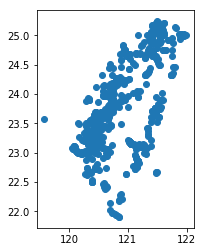

In [73]:
gdf.plot()

In [74]:
gdf.to_csv(r'D:\進階GIS\Final\RoadKill_gdf.csv')